# CS5489 - Tutorial 6
## Dimensionality Reduction and Face Recognition

In this tutorial you will use linear and non-linear dimensionality reduction on face images, and then train a classifier for face recognition. In the second part, you will then use dimensionality reduction for de-noising.

First we need to initialize Python.  Run the below cell.

In [12]:
% matplotlib inline
import matplotlib_inline  # setup output image format

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import matplotlib.pyplot as plt
from numpy import *
from sklearn import *

random.seed(100)
rbow = plt.get_cmap('rainbow')

## Loading Data and Pre-processing
We first need to load the images.  Download `olivetti_py3.pkz` from Canvas, and place it in in the same directory as this ipynb file.  _DO NOT UNZIP IT_.  Then run the following cell to load the images.

In [13]:
oli = datasets.fetch_olivetti_faces(data_home="./")
X = oli.data.astype('float')
Y = oli.target
img = oli.images
imgsize = oli.images[0].shape

Each image is a 64x64 array of pixel values, resulting in a 4096 dimensional vector.  Run the below code to show an example:

(64, 64)


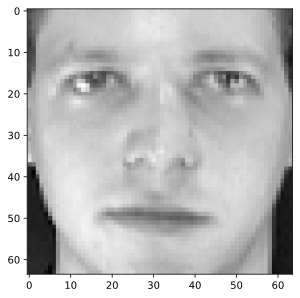

In [14]:
print(img[0].shape)
plt.imshow(img[0], cmap='gray', interpolation='nearest')
plt.show()

Run the below code to show all the images!

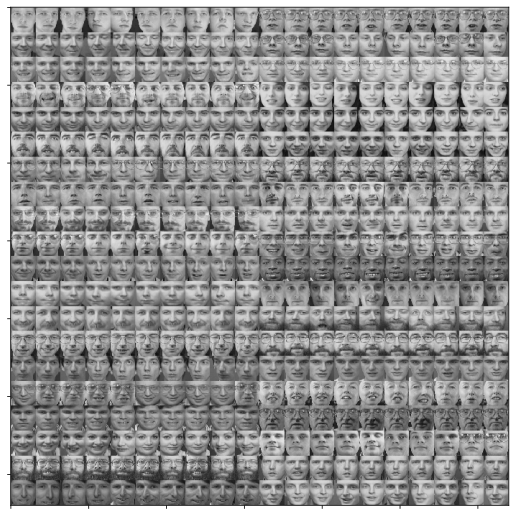

In [15]:
tmp = []
for i in range(0, 400, 20):
    tmp.append(hstack(img[i:i + 20]))
allimg = vstack(tmp)
plt.figure(figsize=(9, 9))
plt.imshow(allimg, cmap='gray', interpolation='nearest')
plt.gca().xaxis.set_ticklabels([])
plt.gca().yaxis.set_ticklabels([])
plt.show()

Each person is considered as one class, and there are 10 images for each class.  In total there are 40 classes (people).  The data is already vectorized and put into the matrix `X`. The class labels are in vector `Y`. Now we split the data into training and testing sets.

In [16]:
# randomly split data into 80% train and 20% test set
trainX, testX, trainY, testY = model_selection.train_test_split(X, Y,
                                                                train_size=0.80, test_size=0.20, random_state=4487)

print(trainX.shape)
print(testX.shape)

(320, 4096)
(80, 4096)


# Linear Dimensionality Reduction - PCA
The dimension of the data is too large (4096) so learning classifiers will take a long time.  Instead, our strategy is to use PCA to reduce the dimension first and then use the PCA weights as the representation for each image.  Run PCA oon the data using 9 principal components.

In [17]:
### INSERT YOUR CODE HERE

In [18]:
pca = decomposition.PCA(n_components=9)
W = pca.fit_transform(X)  # returns the coefficients
v = pca.components_  # the principal component vector
m = pca.mean_  # the data mean
print(W.shape, v.shape, m.shape)

(400, 9) (9, 4096) (4096,)


The below function will plot the basis vectors of PCA. Run the next 2 cells to view the PCs.

In [19]:
def plot_basis(model, imgsize):
    cname = model.__class__.__name__
    if cname == 'LDA':
        KK = model.n_components
        comps = model.coef_
        mn = None
    elif cname == 'PCA':
        KK = model.n_components_
        comps = model.components_
        mn = model.mean_
    elif cname == 'NMF':
        KK = model.n_components_
        comps = model.components_
        mn = None
    K = KK
    if mn is not None:
        K += 1
    nr = int(ceil(K / 5.0))
    sind = 1

    #vmin = comps.flatten().min()
    #vmax = comps.flatten().max()

    # plot the mean
    pcfig = plt.figure(figsize=(8, nr * 2))
    if mn is not None:
        plt.subplot(nr, 5, sind)
        plt.imshow(mn.reshape(imgsize), interpolation='nearest')
        plt.title("mean")
        plt.gray()
        plt.gca().xaxis.set_ticklabels([])
        plt.gca().yaxis.set_ticklabels([])
        sind += 1
    # plot the components
    for j in range(0, KK):
        plt.subplot(nr, 5, sind)
        v = comps[j, :]
        I = v.reshape(imgsize)
        plt.imshow(I, interpolation='nearest')
        plt.gray()
        plt.title("basis " + str(j + 1))
        plt.gca().xaxis.set_ticklabels([])
        plt.gca().yaxis.set_ticklabels([])
        sind += 1

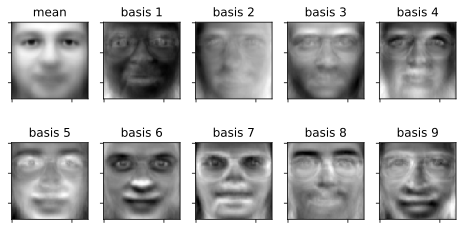

In [20]:
# run the function
plot_basis(pca, imgsize)

_What do the basis images look like? Do some basis images correspond to particular facial features?_
- **INSERT YOUR ANSWER HERE**
- The facial image is very similar to the synthesis of many images. For example, basis 7 mainly shows the feature of eyes, basis 1 mainly shows the feature of skin color, and basis 9 is a very obvious white feature.

## Face Recognition
Now train a _linear_ classifier to do the face recognition.  Use the calculated PCA representation as the new set of inputs.  Use cross-validation to set the hyperparameters of the classifier.  _You do not need to do cross-validation for the number of components._  Calculate the average training and testing accuracies.  Remember to transform the test data into the PCA representation too!

**NOTE**: It is **NOT** recommended to use `svm.SVC` for the training.  This is because the default SVC implements 1-vs-1 multi-class classification, which means it will calculate 40x39=1560 classifiers!  All other classifier should be fine since they do 1-vs-all multi-class classification, e.g., LogisticRegressionCV, LinearSVC, etc.  If you want to use svm.SVC, make sure to use the OneVsRestClassifier as shown in Lecture 3.

In [21]:
### INSERT YOUR CODE HERE

In [22]:
lr = linear_model.LogisticRegressionCV(cv=5, random_state=4487)
lr.fit(pca.transform(trainX), trainY)
print("Training accuracy: ", lr.score(pca.transform(trainX), trainY))
print("Testing accuracy: ", lr.score(pca.transform(testX), testY))

C:\Users\yingyinyu3\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yingyinyu3\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

Training accuracy:  0.9375
Testing accuracy:  0.7375


C:\Users\yingyinyu3\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yingyinyu3\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

## Finding the best number of components
Now try a range of number of components for PCA to get the best test accuracy.  Train a classifier for each one and see which dimension gives the best testing accuracy.  Make a plot of PCA dimension vs. test accuracy.

In [23]:
### INSERT YOUR CODE HERE

C:\Users\yingyinyu3\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yingyinyu3\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

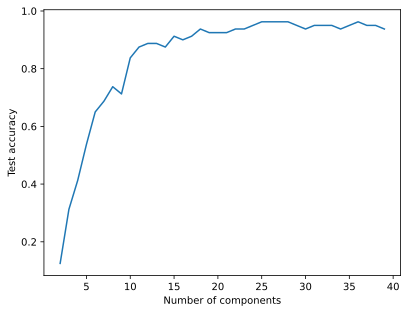

In [24]:
acc = []
for i in range(2, 40):
    pca = decomposition.PCA(n_components=i)
    pca.fit(trainX)
    trainX_pca = pca.transform(trainX)
    testX_pca = pca.transform(testX)
    lr = linear_model.LogisticRegressionCV(cv=5, random_state=4487)
    lr.fit(trainX_pca, trainY)
    acc.append(lr.score(testX_pca, testY))
plt.plot(range(2, 40), acc)
plt.xlabel("Number of components")
plt.ylabel("Test accuracy")
plt.show()

_What is the best number of components?  View the basis images to see what they look like_
- **INSERT YOUR ANSWER HERE**
- The best number is 25 components, and the average value of the image is the same as that of 9 components, but the basic 18-25 are very similar.

In [25]:
### INSERT YOUR CODE HERE

Best number of components:  25
Best test accuracy:  0.9625


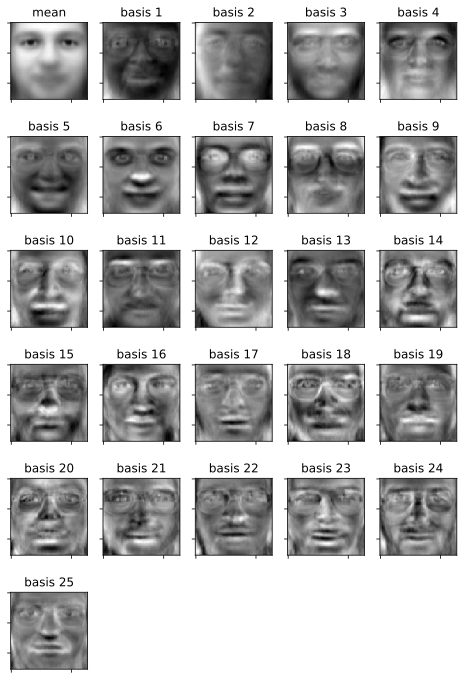

In [26]:
# run the function
print("Best number of components: ", range(2, 40)[argmax(acc)])
print("Best test accuracy: ", max(acc))
pca = decomposition.PCA(n_components=range(2, 40)[argmax(acc)])
pca.fit(trainX)
plot_basis(pca, imgsize)

# Linear Dimensionality Reduction - NMF
Now we will repeat the experiment using non-negative matrix factorization instead of PCA.  Perform NMF with 9 components and visualize the basis images.

In [27]:
### INSERT YOUR CODE HERE

C:\Users\yingyinyu3\AppData\Roaming\Python\Python39\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


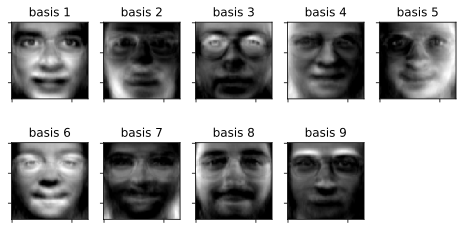

In [28]:
nmf = decomposition.NMF(n_components=9, init='random', random_state=4487)
nmf.fit(trainX)
plot_basis(nmf, imgsize)

_What do the basis images look like?  What is the main difference with the PCA basis images?_
- **INSERT YOUR ANSWER HERE**
- There are many black areas in the image, and the face is more smooth, unlike the image spliced from many pictures.

## Finding the best number of components
Now find the number of components that gives the best test accuracy.  Use the same type of classifier that you used in the previous experiment.  Use cross-validation to select the hyperparameters of the classifier.  You do not need to do cross-validation for the number of components.

In [29]:
### INSERT YOUR CODE HERE

C:\Users\yingyinyu3\AppData\Roaming\Python\Python39\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
C:\Users\yingyinyu3\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yingyinyu3\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max

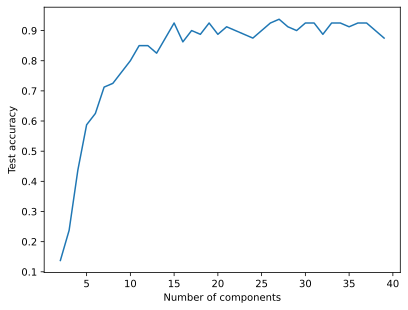

In [30]:
acc = []
for i in range(2, 40):
    nmf = decomposition.NMF(n_components=i, init='random', random_state=4487)
    nmf.fit(trainX)
    trainX_nmf = nmf.transform(trainX)
    testX_nmf = nmf.transform(testX)
    lr = linear_model.LogisticRegressionCV(cv=5, random_state=4487)
    lr.fit(trainX_nmf, trainY)
    acc.append(lr.score(testX_nmf, testY))
plt.plot(range(2, 40), acc)
plt.xlabel("Number of components")
plt.ylabel("Test accuracy")
plt.show()

_Which number of components give the best test result? How does the accuracy compare to the best PCA result?  Why is NMF or PCA better?_
- **INSERT YOUR ANSWER HERE**
- 27 is the best number of components, the accuracy is lower than the best PCA result. The principal component analysis tries to ensure the information content of the original information, but the non-negative decomposition is divided into two non-negative matrices, and the similarity of the original matrix after the multiplication is guaranteed as much as possible, with certain information loss.

In [31]:
### INSERT YOUR CODE HERE

In [32]:
print("Best number of components: ", range(2, 40)[argmax(acc)])
print("Best accuracy: ", max(acc))

Best number of components:  27
Best accuracy:  0.9375


# Non-Linear Dimensionality Reduction - KPCA
Now we will use KPCA to perform non-linear dimensionality reduction on the data  before training the classifier.  Run KPCA on the data using 10 principal components.  Use the RBF kernel with gamma=0.001.

In [33]:
### INSERT YOUR CODE HERE ###

In [34]:
kpca = decomposition.KernelPCA(n_components=10, kernel='rbf', gamma=0.001)
kpca.fit(trainX)

KernelPCA(gamma=0.001, kernel='rbf', n_components=10)

The below function will plot the basis vectors of KPCA. Run the next 2 cells to view the PCs.  The kernel PCs are a combination of similarities to points in the training set.  The PCs are visualized by showing the top 5 positive and negative training examples, along with their coefficient $\alpha_i$.

In [35]:
def plot_kbasis(model, imgsize, X):
    KK = model.n_components
    alphas = model.eigenvectors_.T
    minmax = 5

    py = KK
    px = minmax * 2
    for i in range(KK):
        # sort alphas
        inds = argsort(alphas[i, :])

        myi = r_[arange(-1, -minmax - 1, -1), arange(minmax - 1, -1, -1)]
        myinds = inds[myi]

        for j, jj in enumerate(myinds):
            plt.subplot(py, px, (j + 1) + i * px)
            plt.imshow(X[jj, :].reshape(imgsize), interpolation='nearest')
            plt.gray()
            if alphas[i, jj] < 0:
                mycol = 'b'
            else:
                mycol = 'r'
            plt.title("{:.3f}".format(alphas[i, jj]), fontsize=7, color=mycol)
            if (j == 0):
                plt.ylabel('PC' + str(i + 1))
            plt.xticks([])
            plt.yticks([])

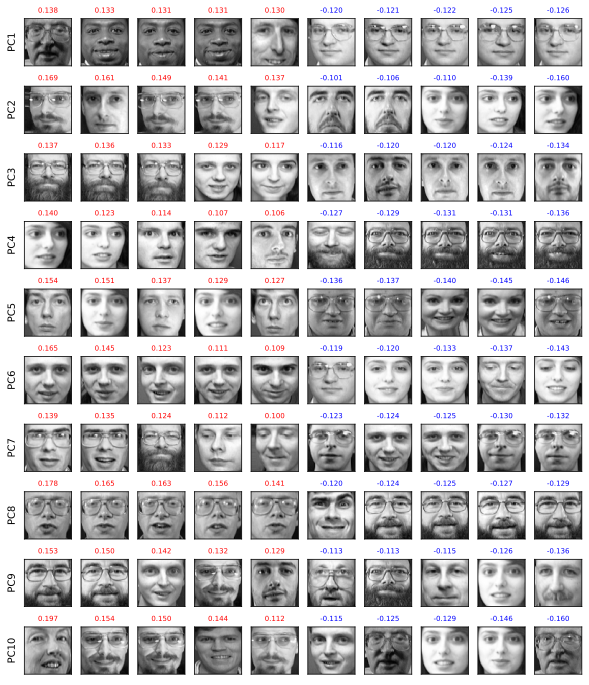

In [36]:
# run the function
plt.figure(figsize=(10, 12))
plot_kbasis(kpca, imgsize, trainX)

_What is the interpretation for the KPCA basis?  What kind of faces do some of the PCs prefer?_
- **INSERT YOUR ANSWER HERE**
- PC8 is most likely to wear eyes and have less hair on the face, so PC8 is most unlikely to wear glasses and have facial whiskers. PC3 has whiskers and eyes, while PC3 has no facial hair and no eyes. It is worth noting that the same person's face will appear repeatedly in the image.

## Finding the best kernel and best number of components
Now try different kernels (poly, RBF, etc), kernel parameters, and number of components to get the best test accuracy.  Train a classifier for each one and see which dimension gives the best testing accuracy.  Make a plots of number of components vs. test accuracy.

C:\Users\yingyinyu3\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yingyinyu3\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

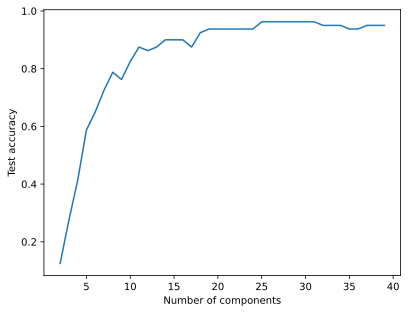

C:\Users\yingyinyu3\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best number of components:  25
Best test accuracy:  0.9625


C:\Users\yingyinyu3\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yingyinyu3\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

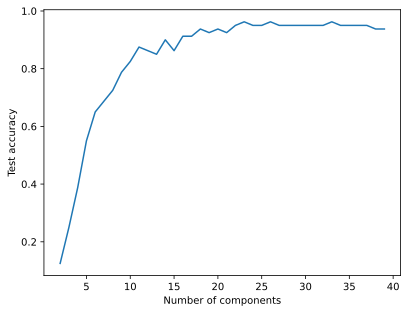

Best number of components:  23
Best test accuracy:  0.9625


C:\Users\yingyinyu3\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yingyinyu3\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

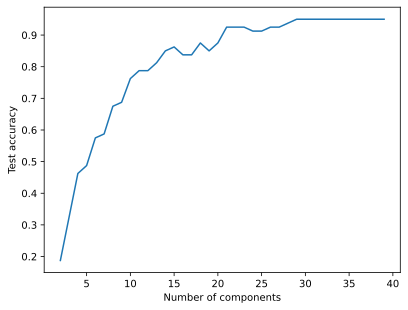

Best number of components:  29
Best test accuracy:  0.95


In [37]:
### INSERT YOUR CODE HERE
acc = []
for i in range(2, 40):
    kpca = decomposition.KernelPCA(n_components=i, kernel='rbf', gamma=0.001)
    kpca.fit(trainX)
    trainX_kpca = kpca.transform(trainX)
    testX_kpca = kpca.transform(testX)
    lr = linear_model.LogisticRegressionCV(cv=5, random_state=4487)
    lr.fit(trainX_kpca, trainY)
    acc.append(lr.score(testX_kpca, testY))
plt.plot(range(2, 40), acc)
plt.xlabel("Number of components")
plt.ylabel("Test accuracy")
plt.show()
print("Best number of components: ", range(2, 40)[argmax(acc)])
print("Best test accuracy: ", max(acc))

acc = []
for i in range(2, 40):
    kpca = decomposition.KernelPCA(n_components=i, kernel='poly', gamma=0.001)
    kpca.fit(trainX)
    trainX_kpca = kpca.transform(trainX)
    testX_kpca = kpca.transform(testX)
    lr = linear_model.LogisticRegressionCV(cv=5, random_state=4487)
    lr.fit(trainX_kpca, trainY)
    acc.append(lr.score(testX_kpca, testY))
plt.plot(range(2, 40), acc)
plt.xlabel("Number of components")
plt.ylabel("Test accuracy")
plt.show()
print("Best number of components: ", range(2, 40)[argmax(acc)])
print("Best test accuracy: ", max(acc))

acc = []
for i in range(2, 40):
    kpca = decomposition.KernelPCA(n_components=i, kernel='sigmoid', gamma=0.001)
    kpca.fit(trainX)
    trainX_kpca = kpca.transform(trainX)
    testX_kpca = kpca.transform(testX)
    lr = linear_model.LogisticRegressionCV(cv=5, random_state=4487)
    lr.fit(trainX_kpca, trainY)
    acc.append(lr.score(testX_kpca, testY))
plt.plot(range(2, 40), acc)
plt.xlabel("Number of components")
plt.ylabel("Test accuracy")
plt.show()
print("Best number of components: ", range(2, 40)[argmax(acc)])
print("Best test accuracy: ", max(acc))

C:\Users\yingyinyu3\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yingyinyu3\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

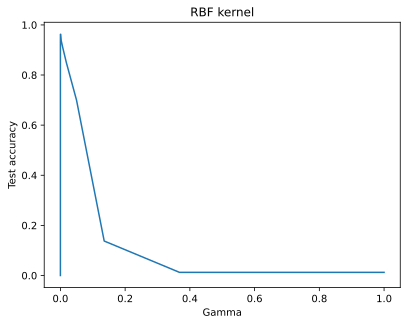

Best gamma:  6.14421235332821e-06
Best test accuracy:  0.9625


C:\Users\yingyinyu3\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yingyinyu3\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

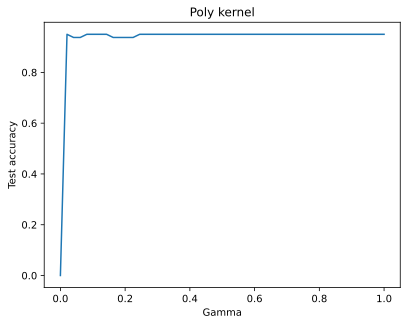

Best gamma:  0.0024787521766663585
Best test accuracy:  0.95


C:\Users\yingyinyu3\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yingyinyu3\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

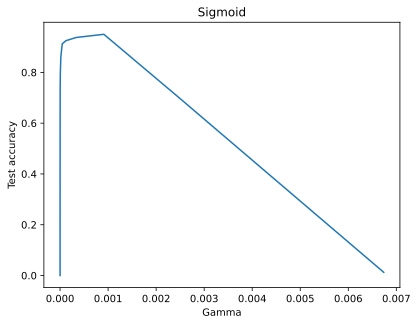

Best gamma:  0.0009118819655545162
Best test accuracy:  0.95


In [38]:
acc = []
for g in exp(-array(range(20))):
    kpca = decomposition.KernelPCA(n_components=25, kernel='rbf', gamma=g)
    trainX_kpca = kpca.fit_transform(trainX)
    testX_kpca = kpca.transform(testX)
    lr = linear_model.LogisticRegressionCV(Cs=logspace(-4, 4, 5), cv=5, random_state=4487, n_jobs=12)
    lr.fit(trainX_kpca, trainY)
    acc.append(metrics.accuracy_score(testY, lr.predict(testX_kpca)))
plt.plot(exp(-array(range(20))), acc)
plt.xlabel("Gamma")
plt.ylabel("Test accuracy")
plt.title("RBF kernel")
plt.show()
print("Best gamma: ", exp(-array(range(5, 50)))[argmax(acc)])
print("Best test accuracy: ", max(acc))

acc = []
for g in linspace(0, 1, 50):
    kpca = decomposition.KernelPCA(n_components=23, kernel='poly', gamma=g)
    trainX_kpca = kpca.fit_transform(trainX)
    testX_kpca = kpca.transform(testX)
    lr = linear_model.LogisticRegressionCV(Cs=logspace(-4, 4, 5), cv=5, random_state=4487)
    lr.fit(trainX_kpca, trainY)
    acc.append(metrics.accuracy_score(lr.predict(testX_kpca), testY))
plt.plot(linspace(0, 1, 50), acc)
plt.xlabel("Gamma")
plt.ylabel("Test accuracy")
plt.title("Poly kernel")
plt.show()
print("Best gamma: ", exp(-array(range(5, 50)))[argmax(acc)])
print("Best test accuracy: ", max(acc))

acc = []
for g in exp(-array(range(5, 50))):
    kpca = decomposition.KernelPCA(n_components=29, kernel='sigmoid', gamma=g)
    trainX_kpca = kpca.fit_transform(trainX)
    testX_kpca = kpca.transform(testX)
    lr = linear_model.LogisticRegressionCV(Cs=logspace(-4, 4, 5), cv=5, random_state=4487)
    lr.fit(trainX_kpca, trainY)
    acc.append(metrics.accuracy_score(lr.predict(testX_kpca), testY))
plt.plot(exp(-array(range(5, 50))), acc)
plt.xlabel("Gamma")
plt.ylabel("Test accuracy")
plt.title("Sigmoid")
plt.show()
print("Best gamma: ", exp(-array(range(5, 50)))[argmax(acc)])
print("Best test accuracy: ", max(acc))

_What is the best kernel and number of components?_
- **INSERT YOUR ANSWER HERE**
- The best kernel is RBF.
- The best number of components is 23.
- The best gamma parameter is 6.14421235332821e-06.
- The best test accuracy is 0.9625.

*Which dimensionality reduction method performs the best for classification? Why?*
- **INSERT YOUR ANSWER HERE**
- The best dimensionality reduction method is Kernel PCA.
- KPCA can capture high-latitude information and PCA itself can retain as much information as possible.

# De-noising with dimensionality reduction

In this section, we will  use dimensionality reduction for denoising a face image. Given a noisy image $\mathbf{x}$, we first compute the low-dimensional representation $\mathbf{w}$, e.g., using PCA. Then given $\mathbf{w}$, we reconstruct the image $\hat{\mathbf{x}}$ from the PCA/NMF basis.  In sklearn, the reconstruction step can be achieved using the `inverse_transform()` method of the PCA or NMF classes.

Train a PCA or NMF model using a large number of components (e.g., 100) on the face dataset, and then test it for denoising. For the noisy images, you can try different types of noise, such as:
- additive noise (using `random.normal`)
- salt & pepper noise (using `random.binomial`)
- masking out part of the image (the masked out part can be replaced with black, gray, or white).


for evaluation of the reconstruction or denoising result you can use "peak signal to noise ratio", which is implemented in skimage as `skimage.metrics.peak_signal_noise_ratio` or `skimage.measure.compare_psnr` (on older versions).

In [54]:
def add_additive_noise(X, sigma=0.1):
    return X + random.normal(0, sigma, size=X.shape)


def add_salt_pepper_noise(X, p=0.1):
    return X * (1 - random.binomial(1, p, size=X.shape))


def add_masking_noise(X, window_size=5, num=5):
    for i in range(num):
        random_wins = random.randint(0, X.shape[0], size=(window_size, window_size))
        X[random_wins] = 0
    return X

In [50]:
### INSERT YOUR CODE HERE

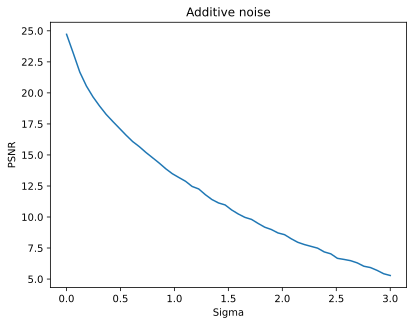

In [52]:
import skimage

# learn PCA
pca = decomposition.PCA(n_components=100)
psnr = []
for sigma in linspace(0.001, 3, 50):
    # add noise to data
    noisyX = add_additive_noise(trainX, sigma=sigma)
    noisyXt = add_additive_noise(testX, sigma=sigma)
    pca.fit(noisyX)
    testW = pca.transform(noisyXt)
    testXr = pca.inverse_transform(testW)  # reconstruction
    psnr.append(skimage.metrics.peak_signal_noise_ratio(testX, testXr))

plt.plot(linspace(0.001, 3, 50), psnr)
plt.xlabel("Sigma")
plt.ylabel("PSNR")
plt.title("Additive noise")
plt.show()

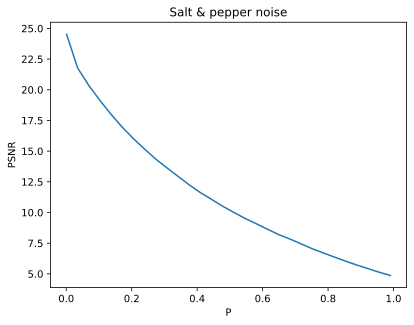

In [56]:
psnr = []
for p in linspace(0.001, 0.99, 30):
    # add noise to data
    noisyX = add_salt_pepper_noise(trainX, p=p)
    noisyXt = add_salt_pepper_noise(testX, p=p)
    pca.fit(noisyX)
    testW = pca.transform(noisyXt)
    testXr = pca.inverse_transform(testW)  # reconstruction
    psnr.append(skimage.metrics.peak_signal_noise_ratio(testX, testXr))
plt.plot(linspace(0.001, 0.99, 30), psnr, label="p={}".format(p))
plt.xlabel("P")
plt.ylabel("PSNR")
plt.title("Salt & pepper noise")
plt.show()

C:\Users\yingyinyu3\AppData\Roaming\Python\Python39\site-packages\sklearn\decomposition\_pca.py:642: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = self.explained_variance_ / total_var
C:\Users\yingyinyu3\Anaconda3\lib\site-packages\skimage\metrics\simple_metrics.py:163: RuntimeWarning: divide by zero encountered in double_scalars
  return 10 * np.log10((data_range ** 2) / err)
C:\Users\yingyinyu3\AppData\Roaming\Python\Python39\site-packages\sklearn\decomposition\_pca.py:642: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = self.explained_variance_ / total_var
C:\Users\yingyinyu3\Anaconda3\lib\site-packages\skimage\metrics\simple_metrics.py:163: RuntimeWarning: divide by zero encountered in double_scalars
  return 10 * np.log10((data_range ** 2) / err)
C:\Users\yingyinyu3\AppData\Roaming\Python\Python39\site-packages\sklearn\decomposition\_pca.py:642: RuntimeWarning: invalid value encountered in tr

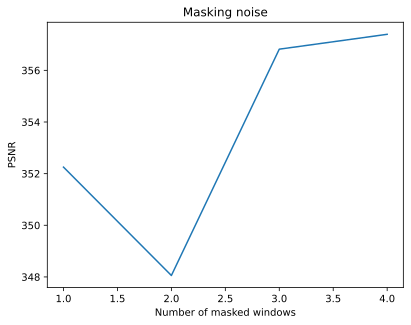

In [58]:
psnr = []
for num in range(1, 10):
    # add noise to data
    noisyX = add_masking_noise(trainX, window_size=num)
    noisyXt = add_masking_noise(testX, window_size=num)
    pca.fit(noisyX)
    testW = pca.transform(noisyXt)
    testXr = pca.inverse_transform(testW)  # reconstruction
    psnr.append(skimage.metrics.peak_signal_noise_ratio(testX, testXr))
plt.plot(range(1, 10), psnr, label="p={}".format(p))
plt.xlabel("Number of masked windows")
plt.ylabel("PSNR")
plt.title("Masking noise")
plt.show()

_Which kind of noise can be handled well by linear dimensionality reduction? Why?_
- **INSERT YOUR ANSWER HERE**
- Linear dimensionality reduction is best suited for handling additive noise, which is noise that is added to the original signal. This is because linear dimensionality reduction techniques are designed to reduce the dimensionality of the data while preserving the original signal, and additive noise can be filtered out by reducing the dimensionality of the data.